<a href="https://colab.research.google.com/github/surajpai50612/Major-Project--Sentiment-Analysis-on-Review-Dataset-NLP-/blob/main/Sentiment%20Analysis%20on%20Review%20Dataset(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Modules**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd

## **Loading the Data**

In [ ]:
df=pd.read_csv('sentiment_review.csv') # upload the file with same name while executing
df

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
2994,I remember seeing this on TV in the late 70s -...,positive
2995,To experience Head you really need to understa...,positive
2996,"I'm a fan of Judy Garland, Vincente Minnelli, ...",negative
2997,"""Mr. Harvey Lights a Candle"" is anchored by a ...",positive


## **Analysing the data (Visualizing the dataset using WordCloud)**

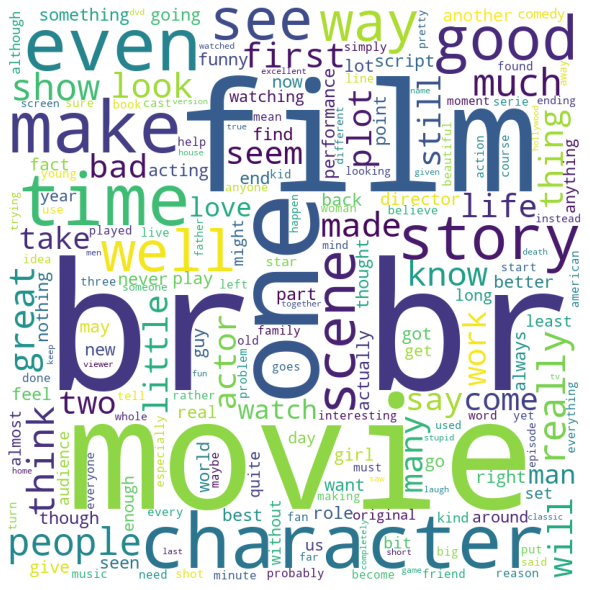

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.iloc[:,0].values: 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## **Applying TFIDF Vectorizer and Native Bayes Algorithm**


In [ ]:
df['Sentiment'].value_counts()

positive    1508
negative    1491
Name: Sentiment, dtype: int64

In [ ]:
x=df.iloc[:,0].values # Input data : Review
y=df.iloc[:,1].values # Output data : Sentiment

In [ ]:
# Splitting into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape

(2099,)

In [ ]:
y_train.shape

(2099,)

In [ ]:
x_test.shape

(900,)

In [ ]:
y_test.shape

(900,)

### **Pipelining**

In [ ]:
text_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [ ]:
# Fitting the model
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Predicted output
y_pred=text_model.predict(x_test)
y_pred[0:20]

array(['positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive'],
      dtype='<U8')

In [ ]:
# Acutal output
y_test[0:20]

array(['negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative'],
      dtype=object)

## **Evaluating Model**

#### **Accuracy Score**

In [ ]:
print("Accuracy score is :\n"+str(accuracy_score(y_pred,y_test)))

Accuracy score is :
0.8233333333333334


#### **Confusion Matrix**

In [ ]:
print("Confusion matrix is :\n"+str(confusion_matrix(y_pred,y_test)))

Confusion matrix is :
[[375  79]
 [ 80 366]]


#### **Classification Report**

In [ ]:
print("Classification report is :\n\n{}:\n\n\n{}\n".format(text_model,classification_report(y_test, y_pred)))

Classification report is :

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False):


           

#### **Predicting sentiments**

In [ ]:
text_model.predict(df.iloc[3:4,0].values)

array(['negative'], dtype='<U8')

In [ ]:
text_model.predict(df.iloc[2:3,0].values)

array(['positive'], dtype='<U8')